# Multiple Linear Regression
## BoomBikes Study

#### Problem Statement:

A US bike-sharing provider BoomBikes decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —

 - Understand the factors on which the demand for these shared bikes depends.
 - They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
     - Which variables are significant in predicting the demand for shared bikes.
     - How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Let us first import necessary libraries and read the dataset

In [271]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### Data Disctionary

day.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [272]:
bikeRentalData = pd.read_csv("day.csv")

In [273]:
# Check the head of the dataset
bikeRentalData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [274]:
bikeRentalData.shape

(730, 16)

In [275]:
bikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [276]:
bikeRentalData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Looking for varience across columns

In [277]:
# looking for varience across columns
(bikeRentalData.nunique()).sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

## Step 2: Visualising the Data

Let's observe 
- If there is some obvious multicollinearity going on
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


#### Visualising Numeric Variables


In [278]:
numVars =  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

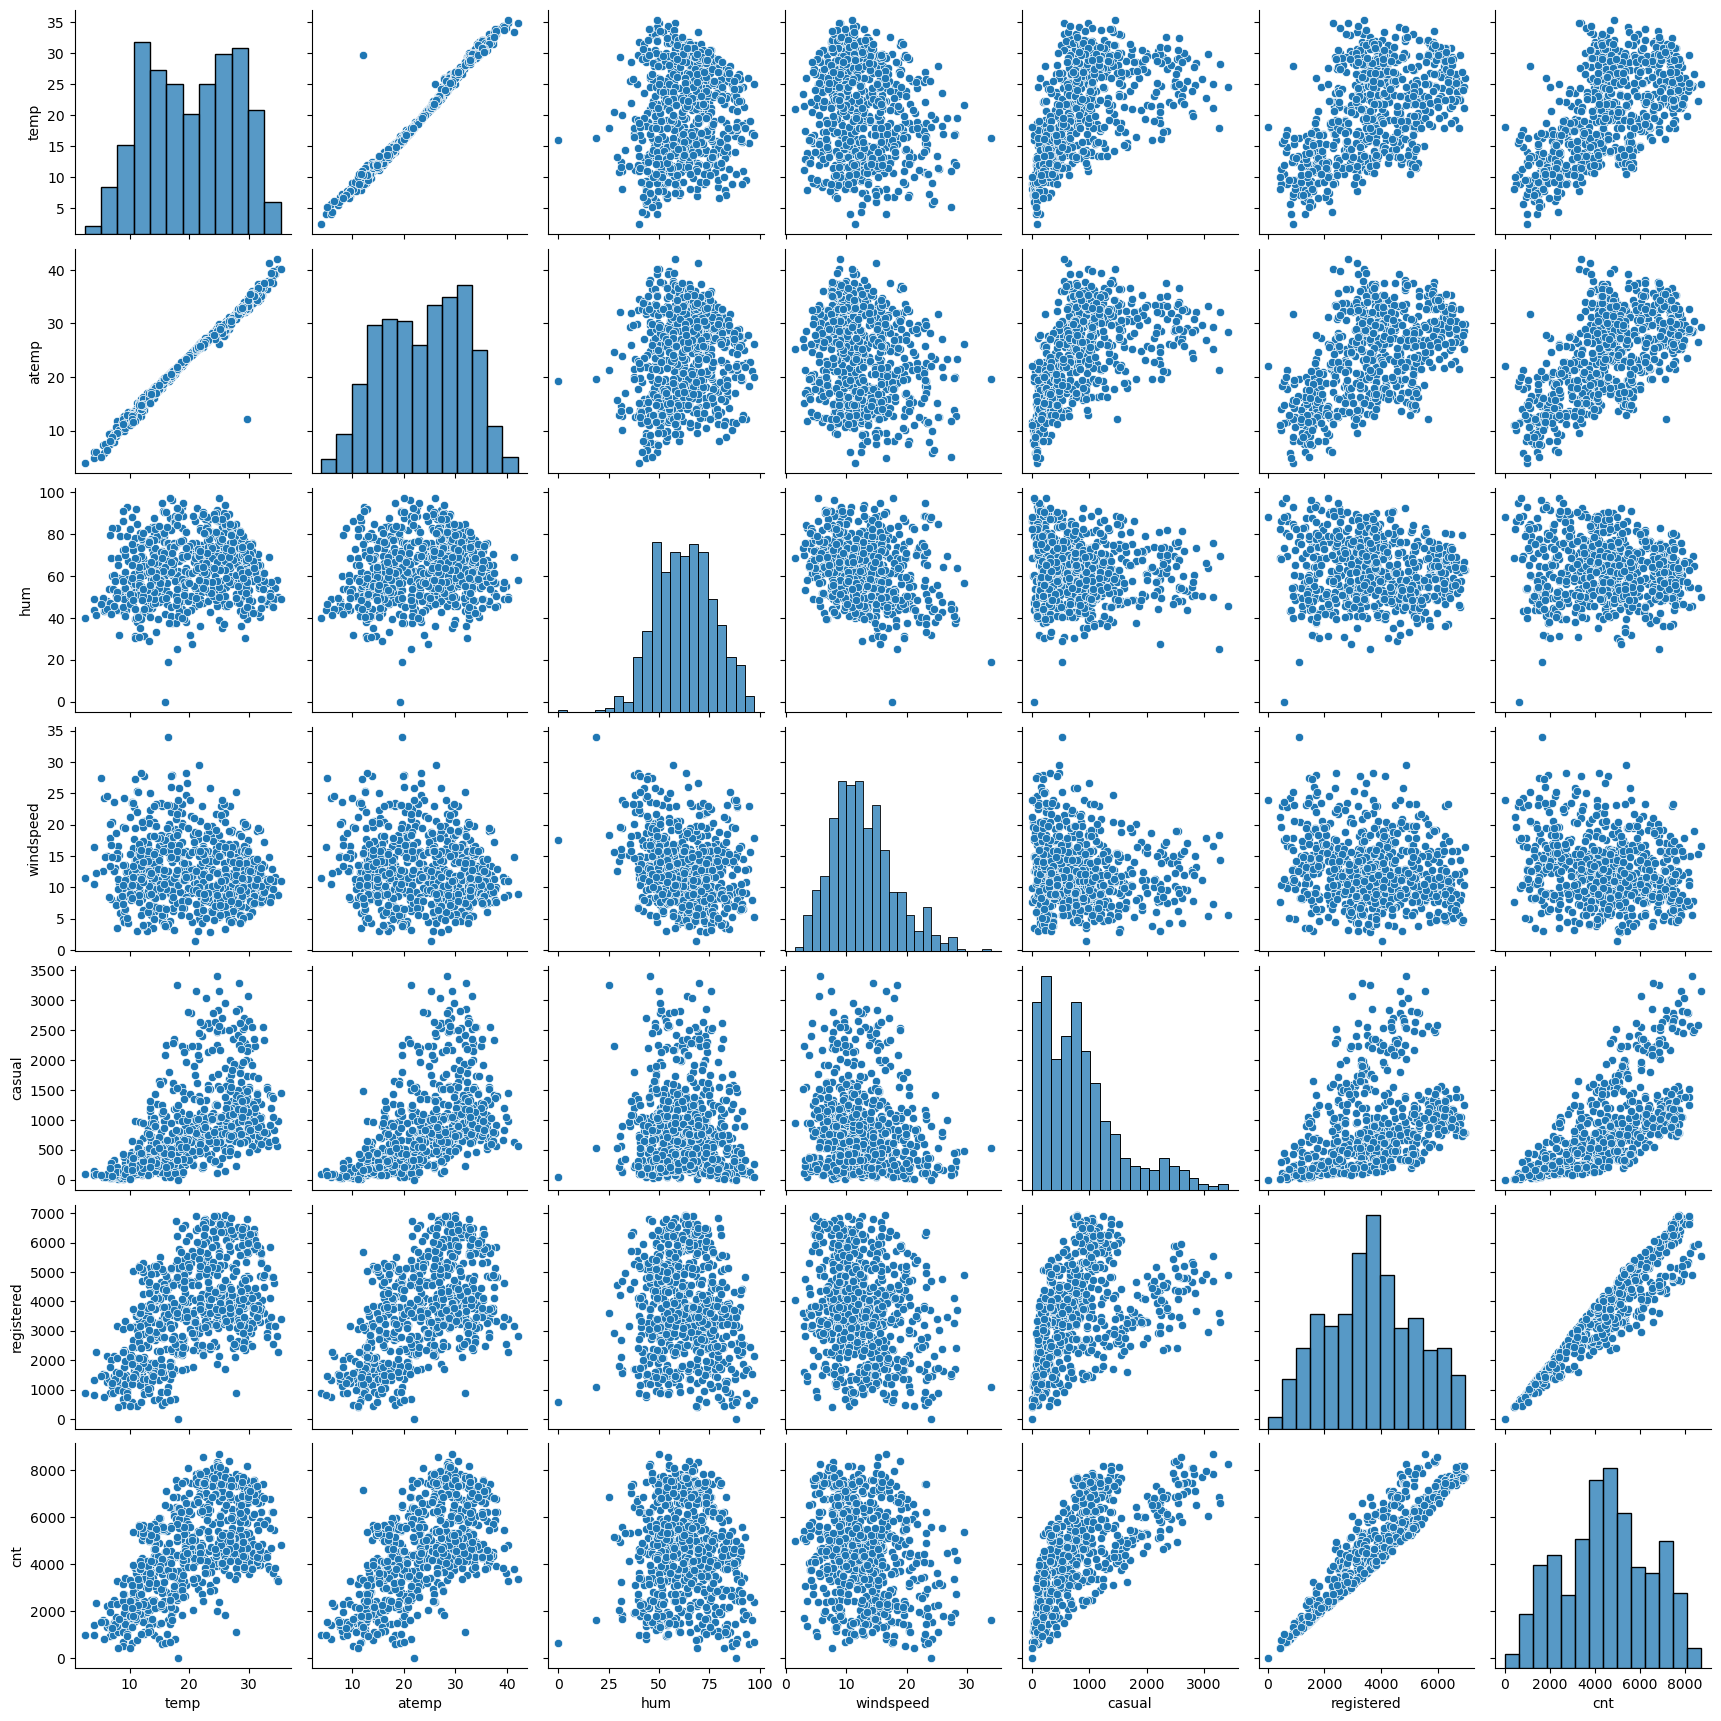

In [279]:
sns.pairplot(bikeRentalData[numVars])
plt.show()

**Understandably, `registered` and `casual` have collinearity with `cnt`. Similar correlation exists with `temp` and `atemp`**

#### Visualising Categorical Variables

there are a few categorical variables. Using boxplot for some of these variables.

Create derived variable 'dayOfMonth' to see if there is any pattern

In [280]:
bikeRentalData['dayOfMonth'] = bikeRentalData['dteday'].apply(lambda x: int(x.split('-')[0]))

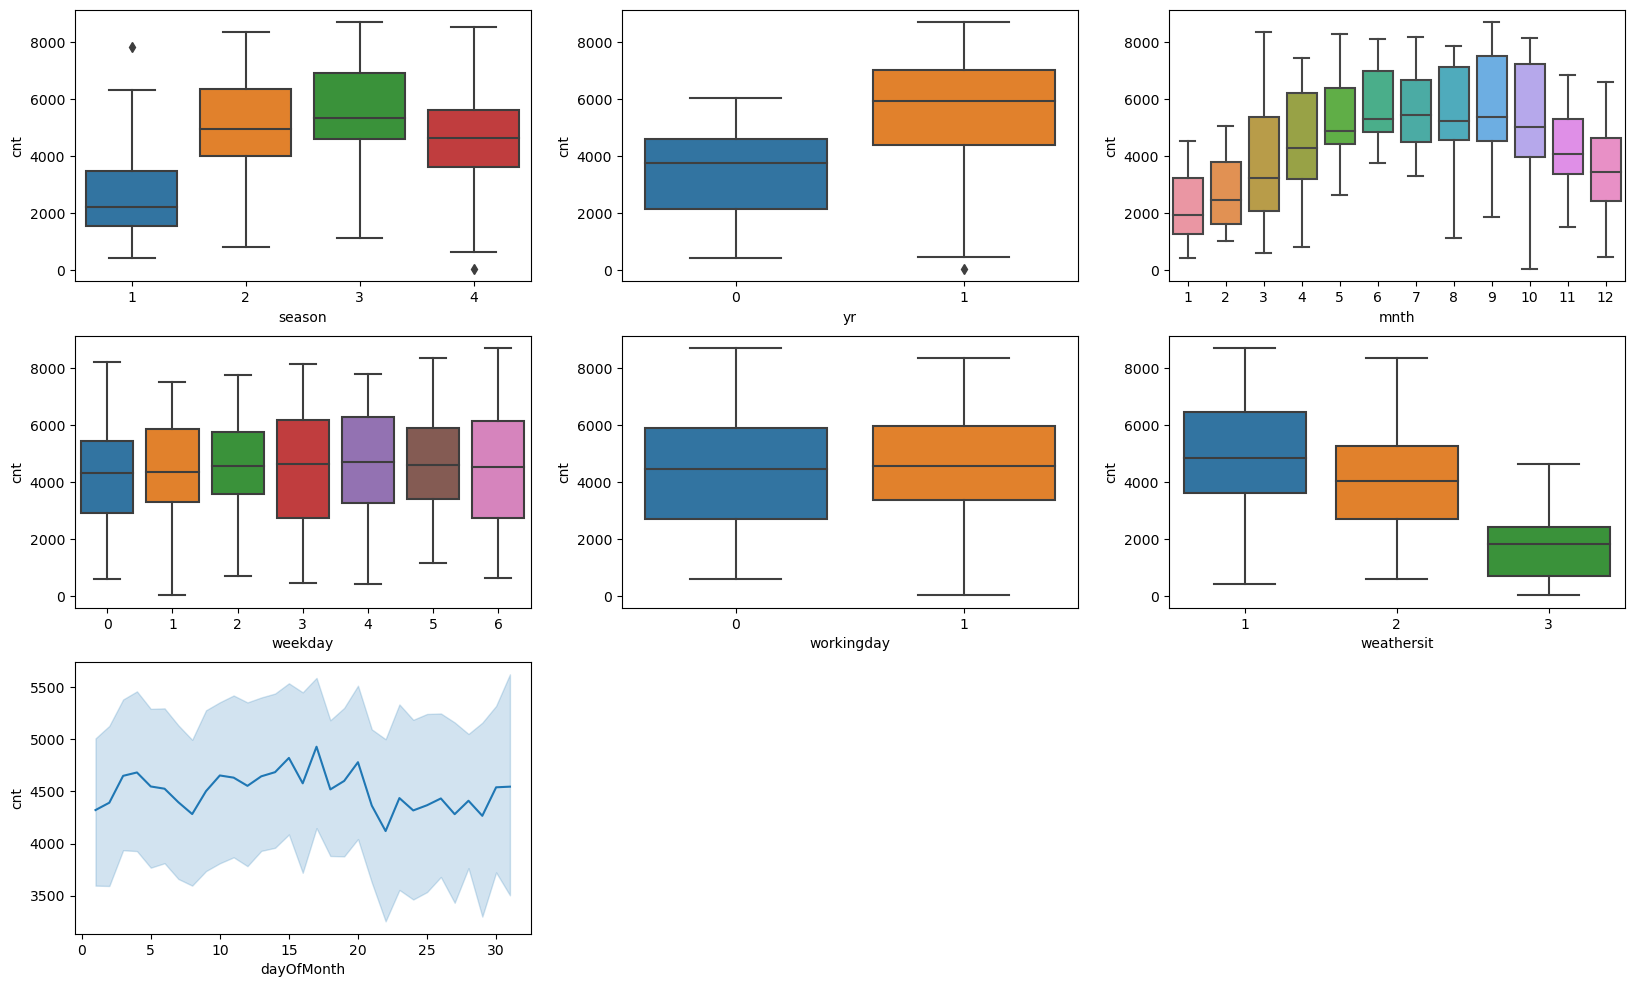

In [281]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeRentalData)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeRentalData)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeRentalData)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeRentalData)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeRentalData)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeRentalData)
plt.subplot(3,3,7)
sns.lineplot(x = 'dayOfMonth', y = 'cnt', data = bikeRentalData)
plt.show()

`dayOfMonth` doesn't seem to have any significance

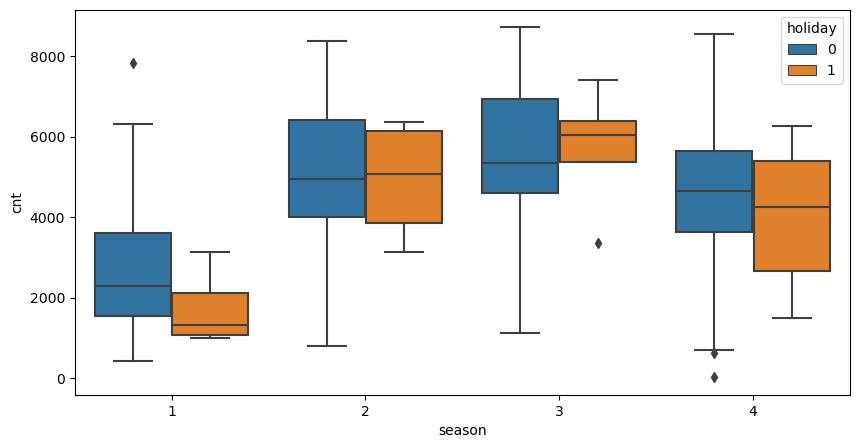

In [282]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bikeRentalData)
plt.show()

#### Observations:

 - season: Fall (3) season has the highest demand.
 - year: bike demand has increased from 2018 to 2019.
 - month: Rentals a less in months of Dec, Jan and Feb due to (probably) environmental conditions (snow fall etc.) leading to this pattern 
 - weekday: there is no particular pattern.
 - working day: on workingday, bike demand is little high.
 - weathersit: when weathersit is clear, bike demand is high.
 - Thursday, Friday, Saturday have more bookings when compared to the start of the week.

## Step 3: Data Preparation

### Dummy Variables

The variable `season` has four levels and `weathersit` has 3 levels. 
For this, we will use `dummy variables`.

In [283]:
# Get the dummy variables for the feature 'weathersit' and 'season' variables and store it in a new variable - 'status'
bikeRentalData = pd.get_dummies(bikeRentalData, columns=['weathersit', 'season'],drop_first=True)


In [284]:
bikeRentalData.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dayOfMonth,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0,0,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0,0,0,0,0


Now, you don't need all columns. `weathersit`, `season` columns are dropped, as the respective types can be identified with just two columns where — 

Weather:
- `00` will correspond to weathersit_3 aka `bad_conditions`
- `01` will correspond to weathersit_2 aka `moderate_conditions`
- `10` will correspond to weathersit_1 aka `good_conditions`

Season:
- `000` will correspond to season_1 aka `spring`
- `001` will correspond to season_2 aka `summer`
- `010` will correspond to season_3 aka `fall`
- `100` will correspond to season_4 aka `winter`

### Data Cleaning - Omit the columns based on observations made thus far 
- `dteday` as combination of `dayOfMonth`, `mnth` and `yr` would depict it
- `instant` seems to be unique key in the dataset. can be dropped
- `registered` and `casual` as they have direct relation to 'cnt' and insignificant
- `atemp` as it is highly correlated with `temp`

In [285]:
dropCols = ['atemp', 'dteday', 'instant','registered', 'casual']
bikeRentalData = bikeRentalData.drop(dropCols, axis=1)

In [286]:
bikeRentalData.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayOfMonth,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,1,0,0,0,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,2,1,0,0,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,3,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,4,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,5,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

 Perform a train-test split.

In [287]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeRentalData, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Rescale using Min-Max scaling 


In [288]:
scaler = MinMaxScaler()

In [289]:
# Apply scaler to following columns
num_vars = ['temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [290]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayOfMonth,weathersit_2,weathersit_3,season_2,season_3,season_4
653,1,10,0,2,1,0.509887,0.575354,0.300794,7534,16,0,0,0,0,1
576,1,7,0,2,1,0.815169,0.725633,0.264686,7216,31,0,0,0,1,0
426,1,3,0,6,0,0.442393,0.640189,0.255342,4066,3,1,0,0,0,0
728,1,12,0,0,0,0.245101,0.498067,0.663106,1796,30,0,0,0,0,0
482,1,4,0,6,0,0.395666,0.504508,0.188475,4220,28,1,0,1,0,0


In [291]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayOfMonth,weathersit_2,weathersit_3,season_2,season_3,season_4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.650369,0.320768,4486.382353,15.613725,0.343137,0.029412,0.245098,0.262745,0.24902
std,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.145882,0.169797,1952.158739,8.899450,0.475223,0.169124,0.430568,0.440557,0.43287
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,23.000000,1.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.00000


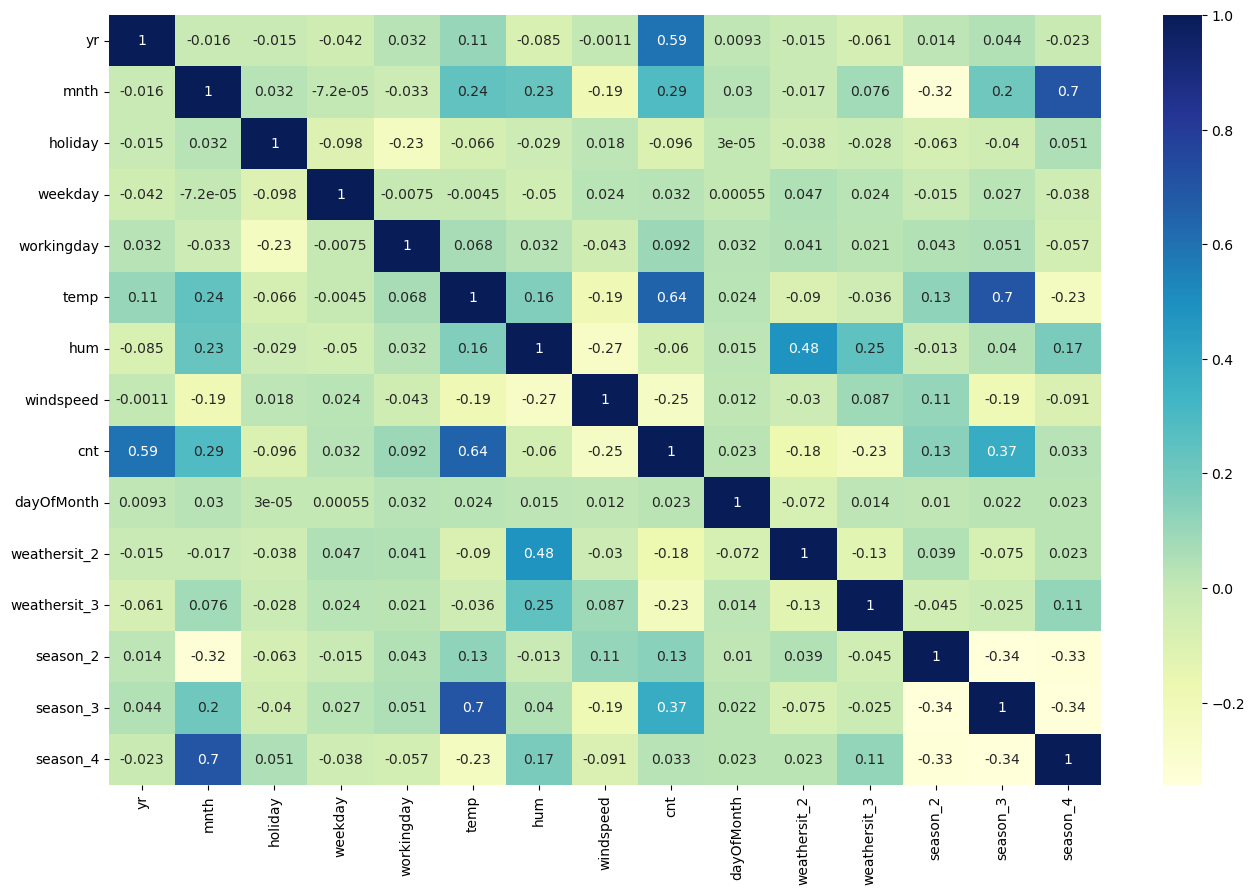

In [292]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

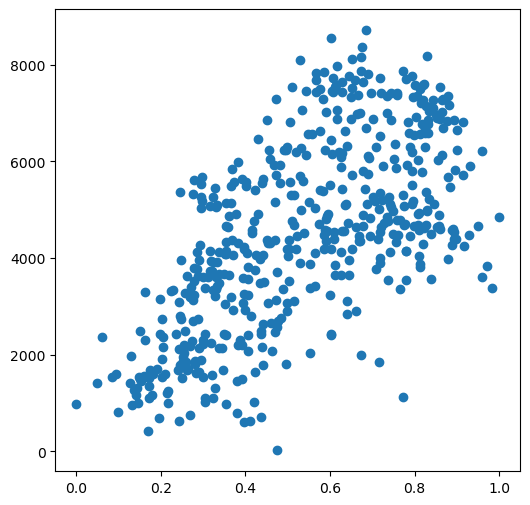

In [293]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and fit a regression line to that.

### Dividing into X and Y sets for the model building

In [294]:
y_train = df_train.pop('cnt')
X_train = df_train

In [295]:
# a Linear Regression model for RFE
sk_lr = LinearRegression()
sk_lr.fit(X_train,y_train)


LinearRegression()

In [335]:
#Selecting 10 features using automated approach
rfe = RFE(sk_lr, n_features_to_select=10)
rfe=rfe.fit(X_train, y_train)


In [336]:
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
0,yr,True,1
1,weekday,True,1
2,workingday,True,1
3,temp,True,1
4,windspeed,True,1
5,weathersit_2,True,1
6,weathersit_3,True,1
7,season_2,True,1
8,season_4,True,1


##### Since the number of variables is small, we will not use this for model building. Instead, we will use this to compare the feature selction with that of manual model

## Step 5: Building an Iterative linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [298]:

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [299]:
# Print a params & summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.80e-61
Time:                        22:41:54   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [300]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [301]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     714.129738
temp     5072.292387
yr       2061.858406
dtype: float64

In [302]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.25e-130
Time:                        22:41:54   Log-Likelihood:                -4288.4
No. Observations:                 510   AIC:                             8583.
Df Residuals:                     507   BIC:                             8596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        714.1297    129.839      5.500      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up.

In [303]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','mnth']]

In [304]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     283.135438
temp     4726.528055
yr       2088.855134
mnth       92.082542
dtype: float64

In [305]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     424.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.22e-137
Time:                        22:41:54   Log-Likelihood:                -4266.8
No. Observations:                 510   AIC:                             8542.
Df Residuals:                     506   BIC:                             8558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        283.1354    140.237      2.019      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [306]:
def build_lrm(X_train, sm):
    X_train_lm = sm.add_constant(X_train)

    mlr = sm.OLS(y_train, X_train_lm).fit()

    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    print(mlr.summary())
    print(vif.sort_values(by='VIF',ascending=False))
    return X_train_lm, mlr

### Build model and check VIF

Add all the variables and review Variance Inflation Factor or VIF. It gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [307]:
X_train_lm, mlr = build_lrm(X_train, sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.54e-182
Time:                        22:41:54   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1525.6510    263.732      5.785   

Looking at the p-values, we could drop the variable with the highest, non-significant p value. Let's review VIF

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. Let's go ahead and find these variables

In [308]:
# Dropping 'hum' as it is highly correlated variable and insignificant variables (pValue - High; VIF - High )
X_train = X_train.drop('hum', axis=1)

In [309]:
X_train_lm, mlr = build_lrm(X_train, sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.57e-181
Time:                        22:41:54   Log-Likelihood:                -4134.8
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          932.7899    187.724      4.969   

In [310]:
# Dropping 'mnth' as it is highly correlated variable and insignificant variables (pValue - High; VIF - High )
X_train = X_train.drop('mnth', axis=1)

In [311]:
X_train_lm, mlr = build_lrm(X_train, sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.09e-182
Time:                        22:41:54   Log-Likelihood:                -4134.8
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          942.2435    179.038      5.263   

In [312]:
# Dropping 'dayOfMonth' as it is highly correlated variable and insignificant variables (pValue - High; VIF - Low )
X_train = X_train.drop('dayOfMonth', axis=1)

In [313]:
X_train_lm, mlr = build_lrm(X_train, sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.96e-184
Time:                        22:41:54   Log-Likelihood:                -4135.2
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     498   BIC:                             8345.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          893.6285    168.708      5.297   

In [314]:
# Dropping 'holiday' as it is negetively correlated with 'cnt'
X_train = X_train.drop('holiday', axis=1)

In [315]:
X_train_lm, mlr = build_lrm(X_train, sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.7
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.72e-184
Time:                        22:41:54   Log-Likelihood:                -4138.0
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     499   BIC:                             8345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          826.7730    167.053      4.949   

In [316]:
# Dropping 'season_3' as it is highly correlated variable with 'temp' and insignificant variables (pValue - Low; VIF - High )
X_train = X_train.drop('season_3', axis=1)

In [317]:
X_train_lm, mlr = build_lrm(X_train, sm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.37e-181
Time:                        22:41:54   Log-Likelihood:                -4145.9
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     500   BIC:                             8354.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          697.3951    166.262      4.195   

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [318]:
y_train_pred = mlr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

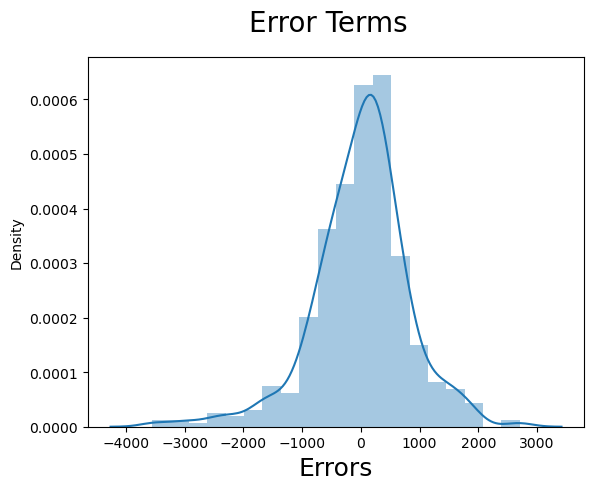

In [319]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observation**: Errors are normally distributed and mean is zero.

#### Checking error terms for any pattern

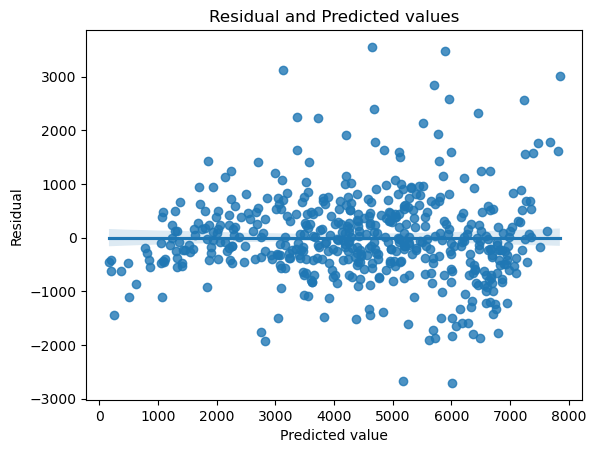

In [320]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

**Observation**: There is no particular relationship between residual and predicted value. 

#### Checking for homoscedasticity of error terms

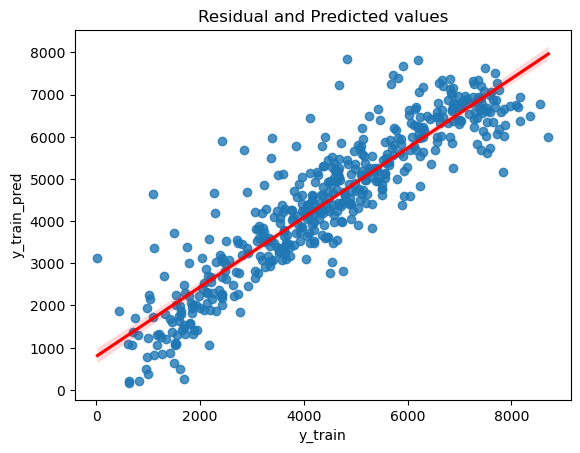

In [321]:
sns.regplot(x= y_train, y=y_train_pred,line_kws={"color": "red"})
plt.title("Residual and Predicted values")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

there is equal variance of predicted value. There is homoscedasticity of error terms as there is no particular high concentration of data points and is constant across prediction.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [322]:
num_vars = ['temp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [323]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,dayOfMonth,weathersit_2,weathersit_3,season_2,season_3,season_4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.638508,0.313350,4546.981735,16.018265,0.319635,0.027397,0.264840,0.246575,0.232877
std,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.148974,0.159947,1898.633630,8.575067,0.467403,0.163612,0.442259,0.432005,0.423633
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [324]:
y_test = df_test.pop('cnt')
X_test = df_test

In [325]:
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,dayOfMonth,weathersit_2,weathersit_3,season_2,season_3,season_4
184,0,7,1,1,0,0.831783,0.657364,0.084219,4,1,0,0,1,0
535,1,6,0,3,1,0.901354,0.610133,0.153728,20,0,0,1,0,0
299,0,10,0,4,1,0.511964,0.837699,0.334206,27,1,0,0,0,1
221,0,8,0,3,1,0.881625,0.437098,0.339570,10,0,0,0,1,0
152,0,6,0,4,1,0.817246,0.314298,0.537414,2,0,0,1,0,0


In [326]:
# Creating X_test_sm dataframe by dropping variables from X_test

X_test_sm = X_test[X_train.columns]

In [327]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

In [328]:
# Making predictions using the fourth model

y_pred_sm = mlr.predict(X_test_sm)

In [329]:
print(y_test.shape)
print(y_pred_sm.shape)

(219,)
(219,)


In [330]:
#evaluate model
r2_score(y_true=y_test, y_pred=y_pred_sm)

0.7865394719247147

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

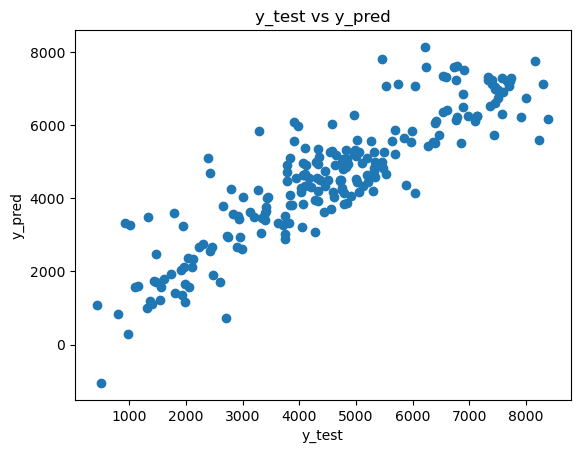

In [331]:
plt.scatter(y_test, y_pred_sm)
plt.title('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

Text(0, 0.5, 'y_test_pred')

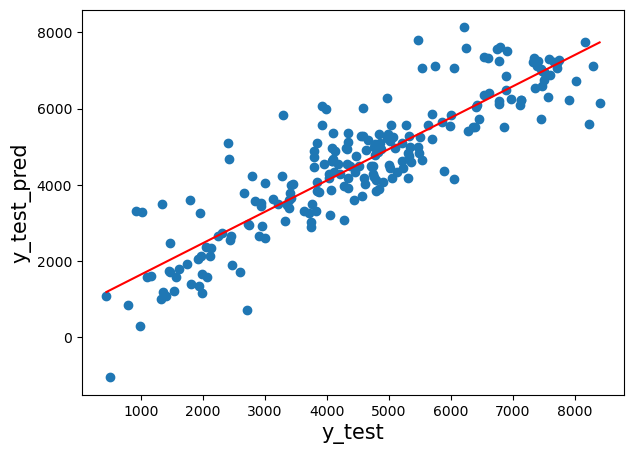

In [332]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(y_test, y_pred_sm, color='tab:blue')
ax.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_sm, 1))(np.unique(y_test)), color='red')
ax.set_xlabel('y_test', fontsize=15)
ax.set_ylabel('y_test_pred', fontsize=15)